**Research question:** Can housing density be predictive of observed avian species diversity at feeders in contiguous North America?

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
total_df = pd.read_csv("PFW_2021_public.csv")

In [8]:
sites_df = pd.read_csv("PFW_count_site_data_public_2021.csv")

sites_df = sites_df.drop(['proj_period_id', 'yard_type_pavement', 'yard_type_garden',
       'yard_type_landsca', 'yard_type_woods', 'yard_type_desert',
       'hab_dcid_woods', 'hab_evgr_woods', 'hab_mixed_woods', 'hab_orchard',
       'hab_park', 'hab_water_fresh', 'hab_water_salt', 'hab_residential',
       'hab_industrial', 'hab_agricultural', 'hab_desert_scrub',
       'hab_young_woods', 'hab_swamp', 'hab_marsh', 'evgr_trees_atleast',
       'evgr_shrbs_atleast', 'dcid_trees_atleast', 'dcid_shrbs_atleast',
       'fru_trees_atleast', 'cacti_atleast', 'brsh_piles_atleast',
       'water_srcs_atleast', 'bird_baths_atleast', 'nearby_feeders',
       'squirrels', 'cats', 'dogs', 'humans',
       'fed_yr_round', 'fed_in_jan', 'fed_in_feb', 'fed_in_mar', 'fed_in_apr',
       'fed_in_may', 'fed_in_jun', 'fed_in_jul', 'fed_in_aug', 'fed_in_sep',
       'fed_in_oct', 'fed_in_nov', 'fed_in_dec', 'numfeeders_suet',
       'numfeeders_ground', 'numfeeders_hanging', 'numfeeders_platfrm',
       'numfeeders_humming', 'numfeeders_water', 'numfeeders_thistle',
       'numfeeders_fruit', 'numfeeders_hopper', 'numfeeders_tube',
       'numfeeders_other', 'population_atleast',
       'count_area_size_sq_m_atleast'], axis = 1)
sites_df

,loc_id,housing_density
0,L100016,2.0
1,L100016,2.0
2,L100016,2.0
3,L100016,2.0
4,L100016,2.0
...,...,...
254350,L999923,1.0
254351,L99994,3.0
254352,L99996,2.0
254353,L9999665,3.0


In [9]:
total_df.columns
total_df = total_df.drop(['latitude', 'longitude',
       'entry_technique', 'sub_id', 'obs_id', 'Month', 'Day', 'Year',
       'PROJ_PERIOD_ID', 'how_many', 'valid', 'reviewed',
       'day1_am', 'day1_pm', 'day2_am', 'day2_pm', 'effort_hrs_atleast',
       'snow_dep_atleast', 'Data_Entry_Method'], axis = 1)
total_df

,loc_id,subnational1_code,species_code
0,L12782033,CA-ON,amtspa
1,L12782033,CA-ON,blujay
2,L12782033,CA-ON,bkcchi
3,L12755941,CA-SK,dowwoo
4,L12755941,CA-SK,whbnut
...,...,...,...
2897100,L2404002,US-NY,daejun
2897101,L2404002,US-NY,amerob
2897102,L2404002,US-NY,houfin
2897103,L2404002,US-NY,norcar


In [26]:
join_df = total_df.set_index('loc_id').join(sites_df.set_index('loc_id'), on = "loc_id", how="inner")
join_df.to_csv("full_join_df.csv")

In [11]:
regions_list = total_df['subnational1_code'].unique()

,housing_density,count
0,1.0,0.288845
1,2.0,0.252988
2,3.0,0.252988
3,4.0,0.205179
4,1.0,0.311377
...,...,...
223,4.0,0.147982
224,1.0,0.314050
225,2.0,0.140496
226,3.0,0.272727


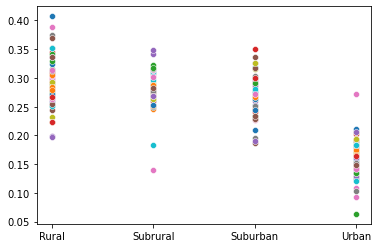

In [12]:
plot_df = pd.DataFrame(columns = ['housing_density', 'count'])


def plot_species_counts(state_name):
    df = join_df[join_df['subnational1_code'] == state_name]
    
    x = ['Rural', 'Subrural', 'Suburban', 'Urban']
    counts_list = []
    
    rural_df = df[df["housing_density"] == 1.0]
    subrural_df = df[df["housing_density"] == 2.0]
    suburban_df = df[df["housing_density"] == 3.0]
    urban_df = df[df["housing_density"] == 4.0]
    
    if len(rural_df) > 0 and len(subrural_df) > 0 and len(suburban_df) > 0 and len(urban_df) > 0:
        rural_count = len(rural_df['species_code'].unique())
        subrural_count = len(subrural_df['species_code'].unique())
        suburban_count = len(suburban_df['species_code'].unique())
        urban_count = len(urban_df['species_code'].unique())

        counts_sum = rural_count + subrural_count + suburban_count + urban_count

        counts_list.append(rural_count / counts_sum)
        counts_list.append(subrural_count / counts_sum)
        counts_list.append(suburban_count / counts_sum)
        counts_list.append(urban_count / counts_sum)

        plot_df.loc[len(plot_df)] = [1.0, rural_count / counts_sum]
        plot_df.loc[len(plot_df)] = [2.0, subrural_count / counts_sum]
        plot_df.loc[len(plot_df)] = [3.0, suburban_count / counts_sum]
        plot_df.loc[len(plot_df)] = [4.0, urban_count / counts_sum]
    
        sns.scatterplot(x = x, y = counts_list)

for state in regions_list:
    plot_species_counts(state)
    
plot_df

In [13]:
new_df = pd.concat([plot_df, pd.get_dummies(plot_df['housing_density'], drop_first = True,)], axis=1)

In [14]:
new_df

,housing_density,count,2.0,3.0,4.0
0,1.0,0.288845,0,0,0
1,2.0,0.252988,1,0,0
2,3.0,0.252988,0,1,0
3,4.0,0.205179,0,0,1
4,1.0,0.311377,0,0,0
...,...,...,...,...,...
223,4.0,0.147982,0,0,1
224,1.0,0.314050,0,0,0
225,2.0,0.140496,1,0,0
226,3.0,0.272727,0,1,0


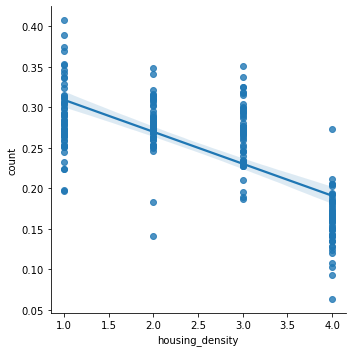

In [15]:
sns.lmplot(data = plot_df, x = 'housing_density', y = 'count')

In [21]:

import statsmodels.api as sm

In [22]:
features = new_df[[2.0, 3.0, 4.0]]
target = new_df['count']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=1)
model = LinearRegression().fit(x_train, y_train)
predictions = model.predict(x_test) 
print("Score:", model.score(x_test, y_test))

print(model.coef_)
print(model.intercept_)

predicted_train = model.predict(x_train)
predicted_test = model.predict(x_test)

train_MSE = metrics.mean_squared_error(y_train, predicted_train)
test_MSE = metrics.mean_squared_error(y_test, predicted_test)

train_MAE = metrics.mean_absolute_error(y_train, predicted_train)
test_MAE = metrics.mean_absolute_error(y_test, predicted_test)

print("Train RSME is " + str(train_MSE**(1/2)))
print("Test RSME is " + str(test_MSE**(1/2)))
print("Train MAE is " + str(train_MAE))
print("Test MAE is " + str(test_MAE))

Score: 0.8220073583090366
[-0.01319442 -0.02394839 -0.12578122]
0.2910375793029062
Train RSME is 0.0377154456264334
Test RSME is 0.028211438994878168
Train MAE is 0.02814690577722218
Test MAE is 0.019835149977816605


In [25]:
Y = new_df['count']
X = new_df[[2.0, 3.0, 4.0]]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     153.0
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           5.74e-54
Time:                        03:53:15   Log-Likelihood:                 434.80
No. Observations:                 228   AIC:                            -861.6
Df Residuals:                     224   BIC:                            -847.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2902      0.005     60.426      0.0